# Data Science Business Analytics Internship

# The Sparks Foundation

##  TSF- Task5     Exploratory data Analysis of 'Indian Premier League'

### Performing 'Exploratory data Analysis' for finding the most successful teams, players and factors contributing win or loss of team 
### And suggesting teams or players a company should endorse for its products 

### Author - Priya Charaya


### Initially let's Import the data

In [395]:
import pandas as pd 
import seaborn as sns 
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np

In [396]:
## Title for matches information file is 'match'
match=pd.read_csv('./matches.csv')

In [397]:
## Title for deleivery information file id 'dl'
dl=pd.read_csv('./deliveries.csv')

In [398]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

#### We have to do Analysis of IPL of last 12 seasons 

In [399]:

match['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

## Names of IPL Teams

In [400]:
## Names of IPL teams 
Team_names=match['team1'].unique()
Team_names.tolist()

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Gujarat Lions',
 'Rising Pune Supergiant',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Delhi Daredevils',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Kochi Tuskers Kerala',
 'Pune Warriors',
 'Rising Pune Supergiants',
 'Delhi Capitals']

## Treatment of missing values 

### Treatment of missing values in 1st data set i.e.match dataset

In [401]:
match.isnull().sum() 

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

#### There are missing values in city,winner,Player of match,umpire(1,2,3)

In [402]:
## As umpire3 column is not relevant in our analysis so I have just dropped it 
match.drop('umpire3',axis=1,inplace=True)

#### As umpire column is not relevant for our studies, so just drop it

In [403]:
## Missing values in City 
match[['city','venue']].loc[match['city'].isnull()]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


#### City has missing values. But the venue of the same matches is Dubai International Cricket Statidum, so we can fill the missing value in city as Dubai 

In [404]:

match['city'].fillna('Dubai',inplace=True)

In [405]:
match['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

#### The city Banglore is written twice in data with spelling error . So, correction is done by converting ''Bengaluru' to 'Bangalore'

In [406]:
match['city'].nunique()

33

In [407]:
match['city'].replace('Bengaluru','Bangalore',inplace=True)

In [408]:
match['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

In [409]:
match['city'].nunique()

32

In [410]:
match['umpire1'].fillna('None',inplace=True)
match['umpire2'].fillna('None',inplace=True)

#### Since there are two missing values in Umpire1 and Umpire2 and it is not relevant for further analysis, so filled missing values in 2 rows with word 'None'

#### Let's handle the Missing value in player of the match and winner

In [411]:
match.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            0
umpire2            0
dtype: int64

In [412]:
match['result'].unique()
## match column has three values in result column

array(['normal', 'tie', 'no result'], dtype=object)

In [413]:
match[['winner','player_of_match','result']][match['winner'].isnull()]


,winner,player_of_match,result
300,NaN,NaN,no result
545,NaN,NaN,no result
570,NaN,NaN,no result
744,NaN,NaN,no result


#### Winner and Player of the match has all missing values  where the reult of match is 'no result'. So we can ignore it as it is justifiable because match doesn't have any otcome

### Treatment of Missing values in second data set i.e. deliveries data 

In [414]:
dl.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [415]:
dl.head(70)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,4,MC Henriques,Yuvraj Singh,STR Binny,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
66,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,5,Yuvraj Singh,MC Henriques,STR Binny,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
67,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,6,Yuvraj Singh,MC Henriques,STR Binny,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
68,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,12,1,MC Henriques,Yuvraj Singh,S Aravind,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


#### Player dismissd and dismissal kind and fielder have information of every ball, So if no player is dismissed then column has nan value and these columns are not relevant for the analysis so fill the missing values with '-'.

In [416]:
dl.fillna('-',inplace=True)

In [417]:
dl.head(70)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,-,-,-
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,-,-,-
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,-,-,-
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,-,-,-
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,4,MC Henriques,Yuvraj Singh,STR Binny,0,...,0,0,0,0,1,0,1,-,-,-
66,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,5,Yuvraj Singh,MC Henriques,STR Binny,0,...,0,0,0,0,2,0,2,-,-,-
67,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,6,Yuvraj Singh,MC Henriques,STR Binny,0,...,0,0,0,0,2,0,2,-,-,-
68,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,12,1,MC Henriques,Yuvraj Singh,S Aravind,0,...,0,0,0,0,1,0,1,-,-,-


In [418]:
dl.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

# 1. Analysis of matches in all IPL seasons

In [419]:
match.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

Text(0.5, 0, 'IPL Teams')

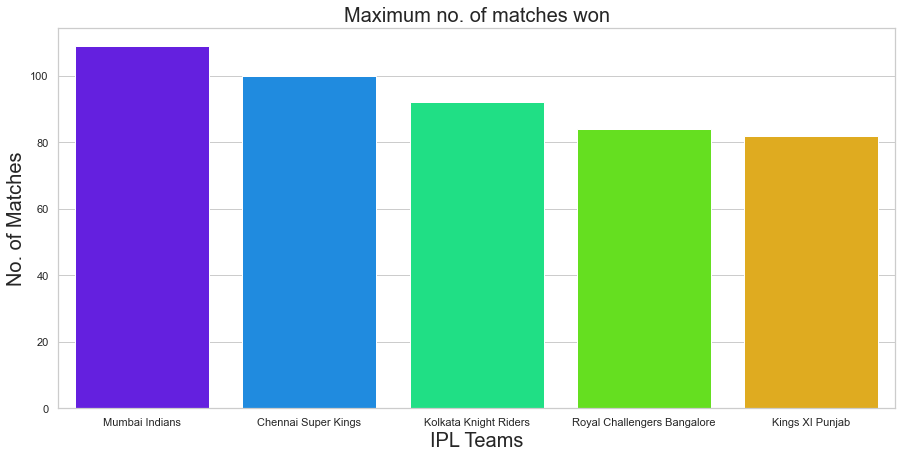

In [431]:
sns.countplot(x='winner',data=match,order=match['winner'].value_counts().iloc[:5].index,palette='gist_rainbow_r')
sns.set(rc={'figure.figsize':(15,7)})
plt.title('Maximum no. of matches won',fontsize=20)
sns.set_style('whitegrid')
plt.ylabel('No. of Matches',fontsize=20)
plt.xlabel('IPL Teams',fontsize=20)


### Mumbai indian have won the maximum IPL matches followed by Chennai Superkings and Kolkata NIght Riders 

In [421]:
match.head(70)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,66,2008,Hyderabad,22-04-2008,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba
66,67,2008,Chennai,23-04-2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar
67,68,2008,Hyderabad,24-04-2008,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson
68,69,2008,Chandigarh,25-04-2008,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba


In [422]:
Team_Win_by_runs=match[['winner','win_by_runs']]
df=Team_Win_by_runs.groupby(by='winner').max()
df.sort_values(by='win_by_runs',ascending=False).head(4)

,win_by_runs
winner,
Mumbai Indians,146
Royal Challengers Bangalore,144
Kolkata Knight Riders,140
Sunrisers Hyderabad,118


#### Mumbai Indians has the record of winning the match by highest runs in IPL History with 146 runs . This match was played between Mumbai Indians and Delhi Daredevils on 6th May, 2017


In [423]:
match.loc[match['win_by_runs']==146]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,06-05-2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


# 2. Factors contributing in winning the match

### Mostly teams who win the toss always prefer to field first.

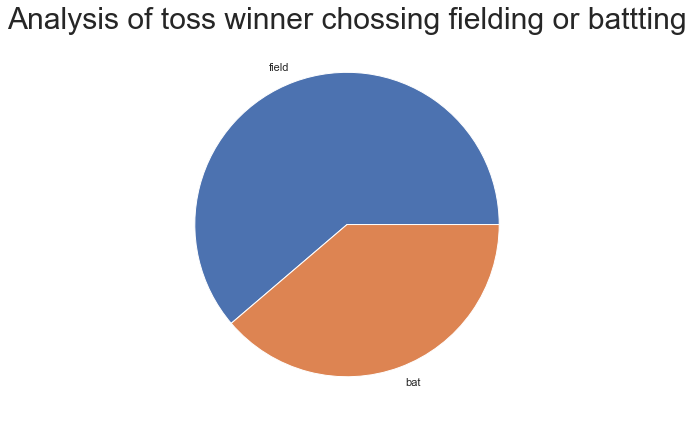

In [424]:
a=match['toss_decision'].value_counts()
plt.pie(x=a,labels=('field','bat'))
plt.title('Analysis of toss winner chossing fielding or battting',fontsize=30)
plt.show()


Text(0.5, 0, 'IPL Teams with maximum toss wins')

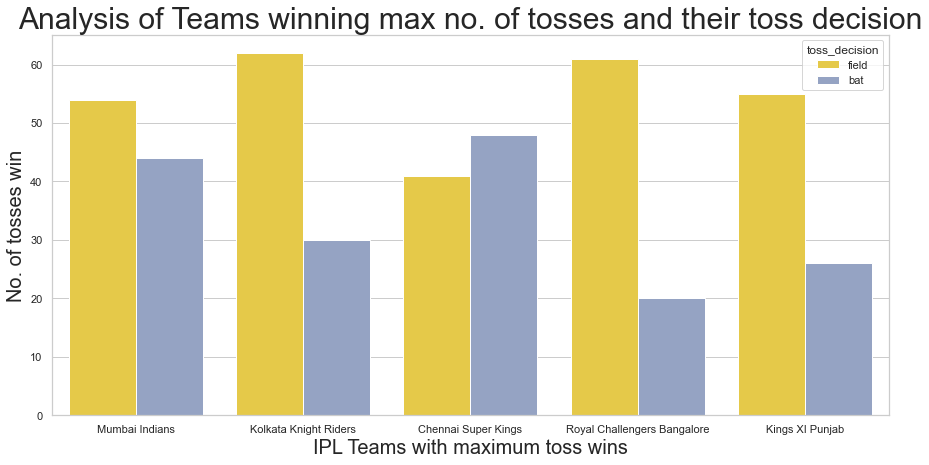

In [425]:
sns.countplot(x='toss_winner',hue='toss_decision',data=match,order=match['toss_winner'].value_counts().iloc[:5].index,palette='Set2_r')
plt.title('Analysis of Teams winning max no. of tosses and their toss decision',fontsize=30)
plt.ylabel('No. of tosses win',fontsize=20)
plt.xlabel('IPL Teams with maximum toss wins',fontsize=20)

#### The top 5 winners who won the maximum matches in the IPL history have also the same record of winning maximum tosses. Mumbai Indian has the highest record of winning maximum tosses and 4 out of 5 teams with maximum toss winning has chosen fielding. 

In [426]:
a=match[['toss_winner','toss_decision','winner']]

In [427]:
b=a.groupby(['winner','toss_decision']).count()
b.sort_values(by='winner')

toss_winner
winner                      toss_decision             
Chennai Super Kings         bat                     52
                            field                   48
Deccan Chargers             bat                     14
                            field                   15
Delhi Capitals              bat                      2
                            field                    8
Delhi Daredevils            bat                     29
                            field                   38
Gujarat Lions               bat                      2
                            field                   11
Kings XI Punjab             bat                     21
                            field                   61
Kochi Tuskers Kerala        field                    6
Kolkata Knight Riders       field                   57
                            bat                     35
Mumbai Indians              bat                     45
                            field                   64
Pune Warriors               bat                      9
                            field                    3
Rajasthan Royals            bat                     34
                            field                   41
Rising Pune Supergiant      field                   10
Rising Pune Supergiants     bat                      2
                            field                    3
Royal Challengers Bangalore bat                     26
                            field                   58
Sunrisers Hyderabad         bat                     21
                            field                   37

### Analysing the range of win_by_runs


In [428]:
match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


Text(0.5, 0, 'Win by Runs')

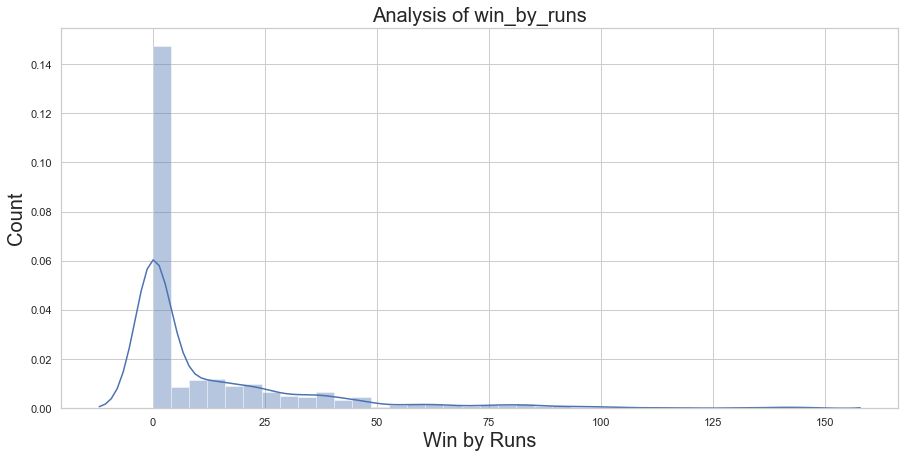

In [429]:
sns.distplot(match['win_by_runs'])
plt.title('Analysis of win_by_runs',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xlabel('Win by Runs',fontsize=20)

#### 75% of the total winning teams in all IPL matches has win_by_runs below 19

# 3. Analysis of Players 

Text(0.5, 0, 'Names of Players')

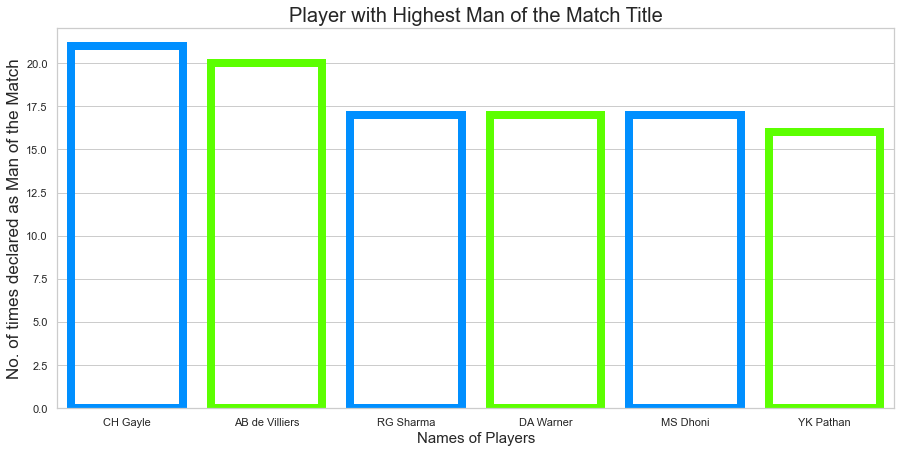

In [434]:
sns.countplot(x='player_of_match',data=match,order=match['player_of_match'].value_counts().iloc[:6].index,linewidth=8,facecolor=(0,0,0,0),edgecolor=sns.color_palette('gist_rainbow_r',2))
plt.ylabel('No. of times declared as Man of the Match',fontsize=17)
plt.title('Player with Highest Man of the Match Title',fontsize=20)
plt.xlabel('Names of Players',fontsize='15')


#### CH Gayle holds the maximum title of 'Man of the Match in entire IPL History'
#### After that Indian Players RG Sharma followed by MS Dhoni holds the maximum title of Man of the Match 

### Batsman with the highest runs in the IPL History

In [435]:
batsman=dl[['batting_team','batsman','total_runs']]

In [436]:
batsman.groupby(['batsman','batting_team']).count().sort_values(by='total_runs',ascending=False).head(5)

,,total_runs
batsman,batting_team,
V Kohli,Royal Challengers Bangalore,4211
SK Raina,Chennai Super Kings,3413
RG Sharma,Mumbai Indians,2907
MS Dhoni,Chennai Super Kings,2837
G Gambhir,Kolkata Knight Riders,2533


#### Concl - Player who have made the highest run in IPL history 
#### 1. Virat Kohli
#### 2. SK Raina 
#### 3. RG Sharma 
#### 4. Ms Dhoni


In [437]:
VK_run=dl['total_runs'][dl['batsman']=='V Kohli']
VK_run

2590      1
2591      1
2593      0
2594      1
2597      0
         ..
177522    1
177523    4
177524    6
177525    1
177527    0
Name: total_runs, Length: 4211, dtype: int64

In [438]:
dl['fielder'].value_counts().sort_values(ascending=False)

-                     172630
MS Dhoni                 159
KD Karthik               152
RV Uthappa               125
SK Raina                 115
                       ...  
B Chipli (sub)             1
AA Bilakhia                1
T Curran                   1
S Sharma                   1
MC Henriques (sub)         1
Name: fielder, Length: 500, dtype: int64

####  Ms. Dhoni is the best Fielder

# Key Insights of Analysis 

## Best Team
### 1. Mumbai Indians has won the maximum no. of matches in IPL history followed by chennai superkings and Kolkata night riders. 
### 2. Team winning the match with maximum win_by_runs is Mumbai Indians 

## Factors responsible for winning 

### 1. Mostly team who has win the toss and choose to field has high chances to win the match.
### 2. Mumbai Indians has won the highest no. of tosses and choose to field first. 

## Best Player 

### 1.Chris Gale has won maximum title of 'Man of the Match'

### 2.Virat Kohli followed by Sk raina have made higest run in the IPL history

### 3.Ms Dhoni is the best fielder 

